In [1]:
!nvidia-smi

Fri Jun 28 11:08:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DRIVE_URL=f"/content/drive/My Drive/gsoc_images"

In [7]:
%cd {DRIVE_URL}
!cp images.zip /content/images.zip
!cp rkd_keys.csv /content/rkd_keys.csv
%cd /content/

/content/drive/My Drive/gsoc_images
/content


In [0]:
!unzip -q images.zip

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
def trim_df(df):
    df['IC1'] = df['Iconclass'].str[:3]
    df = df.groupby('Id').agg({'Iconclass':','.join,'IC1':set}).reset_index()
    df['IC1'] = df['IC1'].str.join(',')
    df["IMG"] = df["Id"].astype(str).__add__(".jpg")
    return df

In [0]:
df = trim_df(pd.read_csv("rkd_keys.csv")[['Iconclass','Id']])

In [0]:
PATH = f"./images"

In [13]:
df[:20]

,Id,Iconclass,IC1,IMG
0,1,73B8,73B,1.jpg
1,79,73B57,73B,79.jpg
2,95,73C8643,73C,95.jpg
3,106,"73D414,73D415",73D,106.jpg
4,108,73B57,73B,108.jpg
5,109,73D94,73D,109.jpg
6,113,73B732,73B,113.jpg
7,135,73D71,73D,135.jpg
8,143,73C11,73C,143.jpg
9,160,73E77,73E,160.jpg


In [0]:
src = ImageList.from_df(df[['IMG','IC1']],PATH).split_by_rand_pct().label_from_df(label_delim=',')

In [0]:
data = src.transform(get_transforms(max_rotate=2.0,max_warp=0.0), size=128).databunch(bs=512)

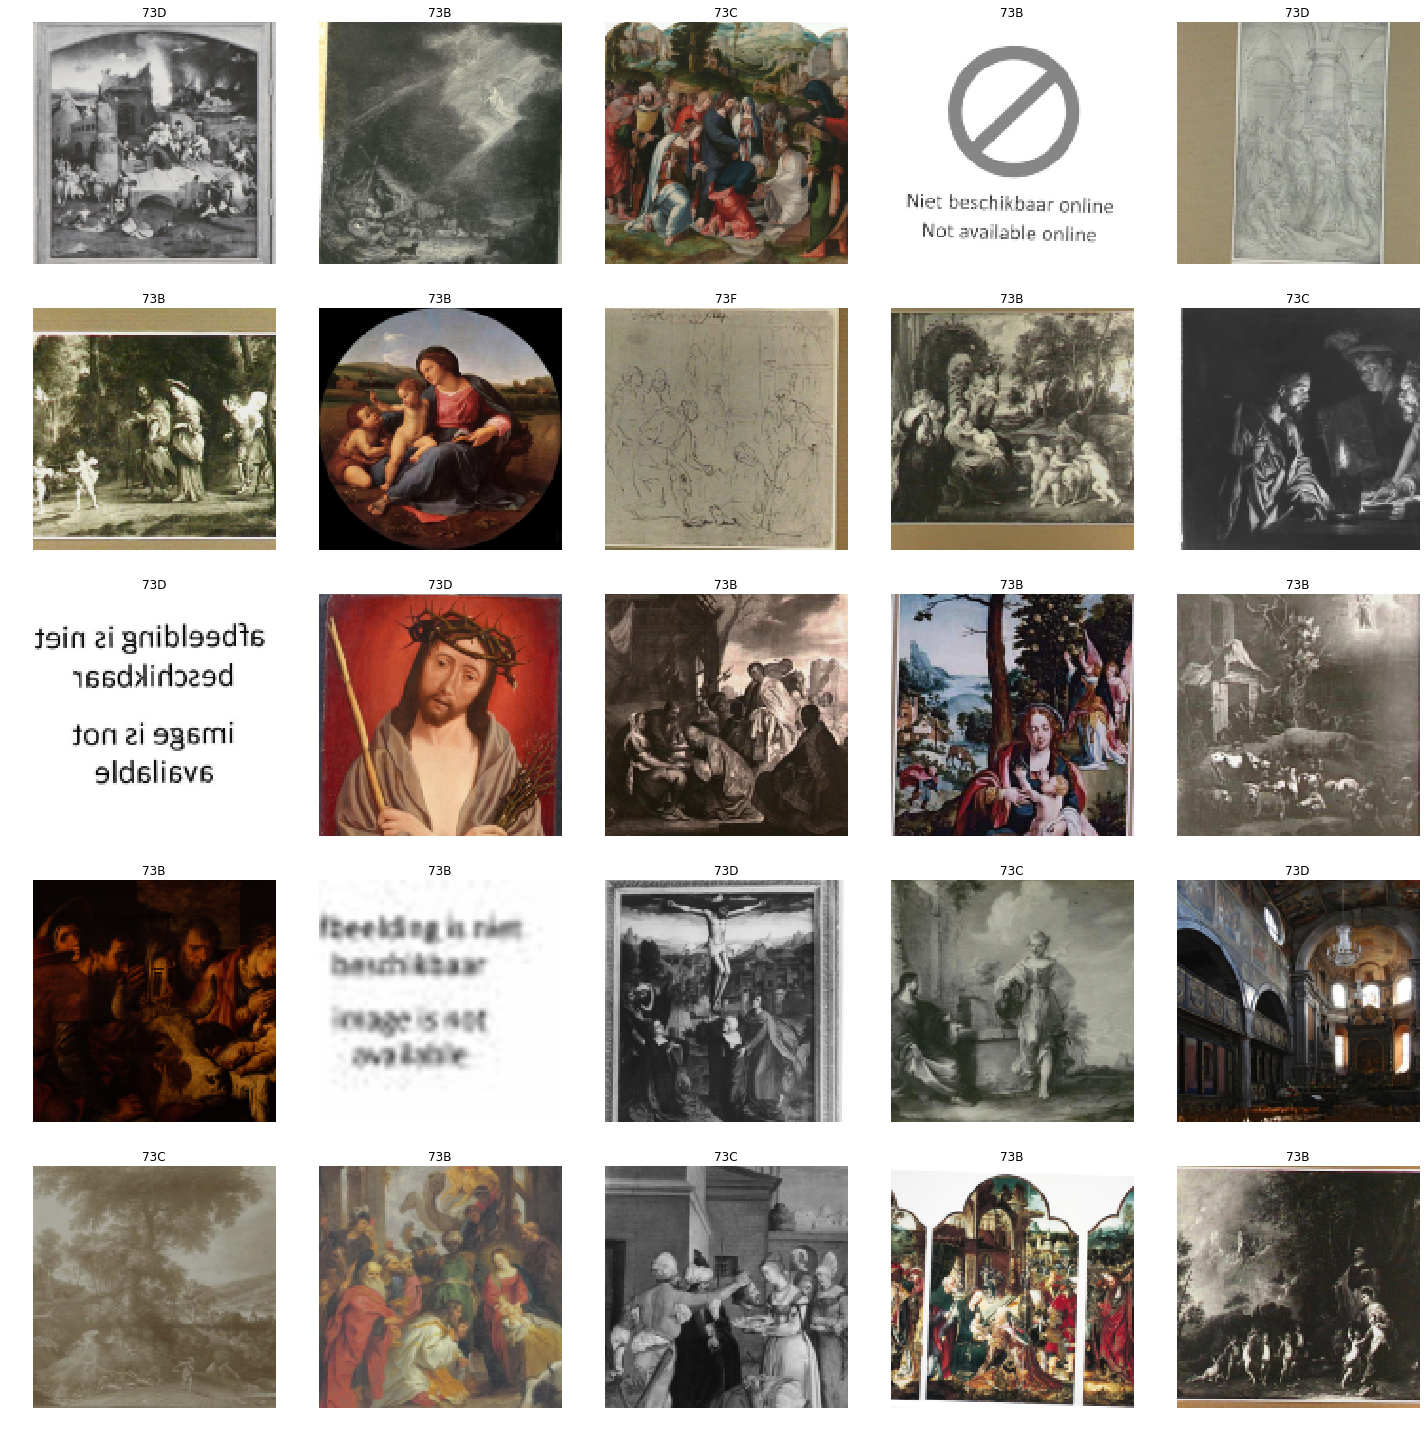

In [17]:
data.show_batch()

In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data,arch,pretrained=True, metrics=[acc_02, f_score])

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


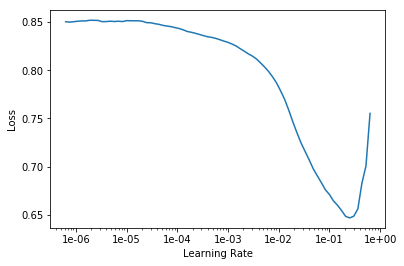

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10,slice(2e-2//3,2e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.620844,0.316889,0.785816,0.547315,02:18
1,0.395817,0.274824,0.813097,0.561942,02:19
2,0.320017,0.266527,0.833759,0.559526,02:17
3,0.283454,0.253483,0.838582,0.599567,02:18
4,0.259891,0.253198,0.850591,0.584715,02:17
5,0.244353,0.249051,0.848605,0.607443,02:16
6,0.232418,0.245947,0.844965,0.606241,02:16
7,0.221850,0.241875,0.850449,0.619284,02:17
8,0.214040,0.242453,0.859007,0.612718,02:17
9,0.207679,0.242541,0.857778,0.611566,02:17


In [0]:
%cd {DRIVE_URL}
learn.save(f'{DRIVE_URL}/RKD1_frozen_2fb0611')
%cd /content

In [0]:
learn = learn.load(f'{DRIVE_URL}/images/models/RKD1_frozen_2fb0611')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


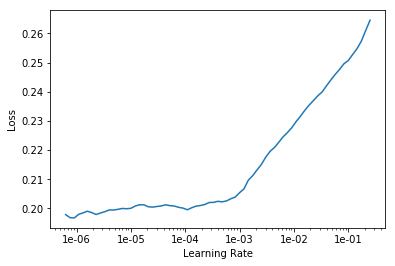

In [0]:
learn.lr_find()
learn.recorder.plot()

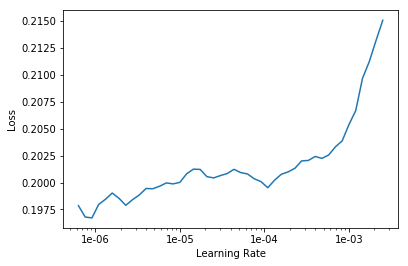

In [0]:
learn.recorder.plot(skip_end=30)

In [0]:
learn.fit_one_cycle(10,slice(1e-2//5,1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.212863,0.251199,0.846241,0.616681,02:14
1,0.218203,0.349678,0.849787,0.536112,02:16
2,0.222759,0.280044,0.863452,0.562066,02:16
3,0.221015,0.253825,0.835461,0.596493,02:16
4,0.214131,0.274766,0.838771,0.536296,02:16
5,0.202070,0.268442,0.856123,0.608389,02:16
6,0.187411,0.231078,0.864634,0.662670,02:15
7,0.166752,0.232500,0.877825,0.645762,02:14
8,0.144140,0.227706,0.885863,0.670999,02:16
9,0.125710,0.228651,0.886809,0.673506,02:17


In [0]:
%cd {DRIVE_URL}
learn.save(f'RKD1_unfrozen_2fb0611')
%cd /content

/content/drive/My Drive/gsoc_images
/content


In [0]:
import torch; torch.cuda.empty_cache()
import gc; gc.collect()

107